https://www.kaggle.com/datasets/sinemgokoz/pressure-ulcers-stages

https://www.kaggle.com/datasets/laithjj/diabetic-foot-ulcer-dfu

https://medpix.nlm.nih.gov/home

In [1]:
import os
from PIL import Image
import shutil

In [9]:
# Especificar aquí los 'path' o rutas absolutas de las carpetas con imágenes de entrada y salida

# Cambiar a la carpeta donde están las imágenes
input_folder = "/home/miller/Escritorio/Filtered/" 
# Cambiar a la carpeta donde se guardan las imágenes filtradas 
output_folder = "/home/miller/Escritorio/1ulcers/"  

os.makedirs(output_folder, exist_ok=True)

# Recorremos todas las imágenes en la carpeta input
for filename in os.listdir(input_folder):
    file_path = os.path.join(input_folder, filename)
    
    # Control
    try:
        with Image.open(file_path) as img:
            width, height = img.size
            
            # Si cumple la condición de dimensiones, copiar la imagen a la carpeta salida
            if width >= 512 and height >= 512:
                shutil.copy(file_path, os.path.join(output_folder, filename))
                print(f"Imagen guardada: {filename}")
    
    except Exception as e:
        print(f"No se pudo procesar {filename}: {e}")

print("Completado!")

Imagen guardada: 51917049_261143791482563_8377598890718789632_n.jpg
Imagen guardada: 51759656_378276979636564_4642156840002519040_n.jpg
Imagen guardada: 53476425_578346712629510_4629946037526593536_n.jpg
Imagen guardada: 51716688_2323852047665716_1256992870041124864_n.jpg
Imagen guardada: بدون عنوان-1نسخ.jpg
Imagen guardada: 40122541_323962865037457_6905035766640934912_n.jpg
Imagen guardada: 52292245_2372443949652292_9184654616078319616_n.jpg
Imagen guardada: 52392495_2352041565030092_7415485474355019776_n.jpg
Imagen guardada: 9101777786086306111.jpg
Imagen guardada: 40684551_286268405533991_382919273858727936_n.jpg
Imagen guardada: 51361417_390073928235564_6976026271759204352_n.jpg
Imagen guardada: 32.jpg
Imagen guardada: 40282914_2086264411689589_9196527000901124096_n.jpg
Imagen guardada: القدم 3.jpg
Imagen guardada: 1.png
Imagen guardada: 51915519_1982447778471205_3884023704132255744_n.jpg
Imagen guardada: 53055705_2319146521637967_7113294045014654976_n.jpg
Imagen guardada: 51842320

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
# Especificar aquí los 'path' o rutas absolutas de las carpetas con imágenes de entrada y salida

# Cambiar a la carpeta donde están las imágenes
input_folder = "img_raw/"
# Cambiar a la carpeta donde se guardan las imágenes filtradas 
output_folder = "img_new/"  # Carpeta donde se guardarán las imágenes redimensionadas

# Crear la carpeta de destino si no existe
os.makedirs(output_folder, exist_ok=True)

# Recorremos todas las imágenes en la carpeta input
for filename in os.listdir(input_folder):
    file_path = os.path.join(input_folder, filename)
    
    # Leemos la imagen con OpenCV
    img = cv2.imread(file_path)
    
    # Control
    if img is not None:

        resized_img = cv2.resize(img, (512, 512), interpolation=cv2.INTER_AREA)
        
        # String con la ruta de la carpeta de salida y el nombre del archivo
        output_path = os.path.join(output_folder, filename)
        # Guardamos
        cv2.imwrite(output_path, resized_img)
        print(f"Imagen redimensionada y guardada: {filename}")
    else:
        print(f"No se pudo leer {filename}, saltando...")

print("Completado!")

In [ ]:
""" Primeros vamos a analizar la imagen del gato en múltiples espacios de color"""
img = cv2.imread('Ulcers/U1.png')
# Img rgb
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Img hsv
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Img XYZ
img_xyz = cv2.cvtColor(img, cv2.COLOR_BGR2XYZ)
# Img LAB
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
# Img YCrCb
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
# Img Luv
img_luv = cv2.cvtColor(img, cv2.COLOR_BGR2Luv)
# Img HLS
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
# Img YUV
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
# Img YIQ
img_Y = 0.299*img_rgb[:,:,0] + 0.587*img_rgb[:,:,1] + 0.114*img_rgb[:,:,2]
img_I = 0.596*img_rgb[:,:,0] - 0.275*img_rgb[:,:,1] - 0.321*img_rgb[:,:,2]
img_Q = 0.212*img_rgb[:,:,0]- 0.523*img_rgb[:,:,1] + 0.311*img_rgb[:,:,2]
# Concatenamos los canales para hacer nuestro YIQ     
img_yiq = np.dstack((img_Y, img_I, img_Q))     
# Img CMY
img_cmy = np.dstack((255-img_rgb[:,:,0], 255-img_rgb[:,:,1], 255-img_rgb[:,:,2]))

In [ ]:
""" Graficamos todos estos espacios de color """

fig, axs = plt.subplots(11, 3, figsize=(10, 40), sharex=True, sharey=True)
# RGB
axs[0, 0].imshow(img_rgb[:,:,0], cmap="gray")
axs[0, 0].set_title("R")
axs[0, 1].imshow(img_rgb[:,:,1], cmap="gray")
axs[0, 1].set_title("G")
axs[0, 2].imshow(img_rgb[:,:,2], cmap="gray")
axs[0, 2].set_title("B")

# HSV
axs[1, 0].imshow(img_hsv[:,:,0], cmap="gray")
axs[1, 0].set_title("H")
axs[1, 1].imshow(img_hsv[:,:,1], cmap="gray")
axs[1, 1].set_title("S")
axs[1, 2].imshow(img_hsv[:,:,2], cmap="gray")
axs[1, 2].set_title("V")

# XYZ
axs[2, 0].imshow(img_xyz[:,:,0], cmap="gray")
axs[2, 0].set_title("X")
axs[2, 1].imshow(img_xyz[:,:,1], cmap="gray")
axs[2, 1].set_title("Y")
axs[2, 2].imshow(img_xyz[:,:,2], cmap="gray")
axs[2, 2].set_title("Z")

# LAB
axs[3, 0].imshow(img_lab[:,:,0], cmap="gray")
axs[3, 0].set_title("L")
axs[3, 1].imshow(img_lab[:,:,1], cmap="gray")
axs[3, 1].set_title("A")
axs[3, 2].imshow(img_lab[:,:,2], cmap="gray")
axs[3, 2].set_title("B")

# YCrCb
axs[4, 0].imshow(img_ycrcb[:,:,0], cmap="gray")
axs[4, 0].set_title("Y")
axs[4, 1].imshow(img_ycrcb[:,:,1], cmap="gray")
axs[4, 1].set_title("Cr")
axs[4, 2].imshow(img_ycrcb[:,:,2], cmap="gray")
axs[4, 2].set_title("Cb")

# Luv
axs[5, 0].imshow(img_luv[:,:,0], cmap="gray")
axs[5, 0].set_title("L")
axs[5, 1].imshow(img_luv[:,:,1], cmap="gray")
axs[5, 1].set_title("u")
axs[5, 2].imshow(img_luv[:,:,2], cmap="gray")
axs[5, 2].set_title("v")

# HLS
axs[6, 0].imshow(img_hls[:,:,0], cmap="gray")
axs[6, 0].set_title("H")
axs[6, 1].imshow(img_hls[:,:,1], cmap="gray")
axs[6, 1].set_title("L")
axs[6, 2].imshow(img_hls[:,:,2], cmap="gray")
axs[6, 2].set_title("S")

# YUV
axs[7, 0].imshow(img_yuv[:,:,0], cmap="gray")
axs[7, 0].set_title("Y")
axs[7, 1].imshow(img_yuv[:,:,1], cmap="gray")
axs[7, 1].set_title("U")
axs[7, 2].imshow(img_yuv[:,:,2], cmap="gray")
axs[7, 2].set_title("V")

# YIQ
axs[8, 0].imshow(img_yiq[:,:,0], cmap="gray")
axs[8, 0].set_title("Y")
axs[8, 1].imshow(img_yiq[:,:,1], cmap="gray")
axs[8, 1].set_title("I")
axs[8, 2].imshow(img_yiq[:,:,2], cmap="gray")
axs[8, 2].set_title("Q");

# BGR
axs[9, 0].imshow(img[:,:,0], cmap="gray")
axs[9, 0].set_title("B")
axs[9, 1].imshow(img[:,:,1], cmap="gray")
axs[9, 1].set_title("G")
axs[9, 2].imshow(img[:,:,2], cmap="gray")
axs[9, 2].set_title("R")

# CMY
axs[10, 0].imshow(img_cmy[:,:,0], cmap="gray")
axs[10, 0].set_title("C")
axs[10, 1].imshow(img_cmy[:,:,1], cmap="gray")
axs[10, 1].set_title("M")
axs[10, 2].imshow(img_cmy[:,:,2], cmap="gray")
axs[10, 2].set_title("Y");

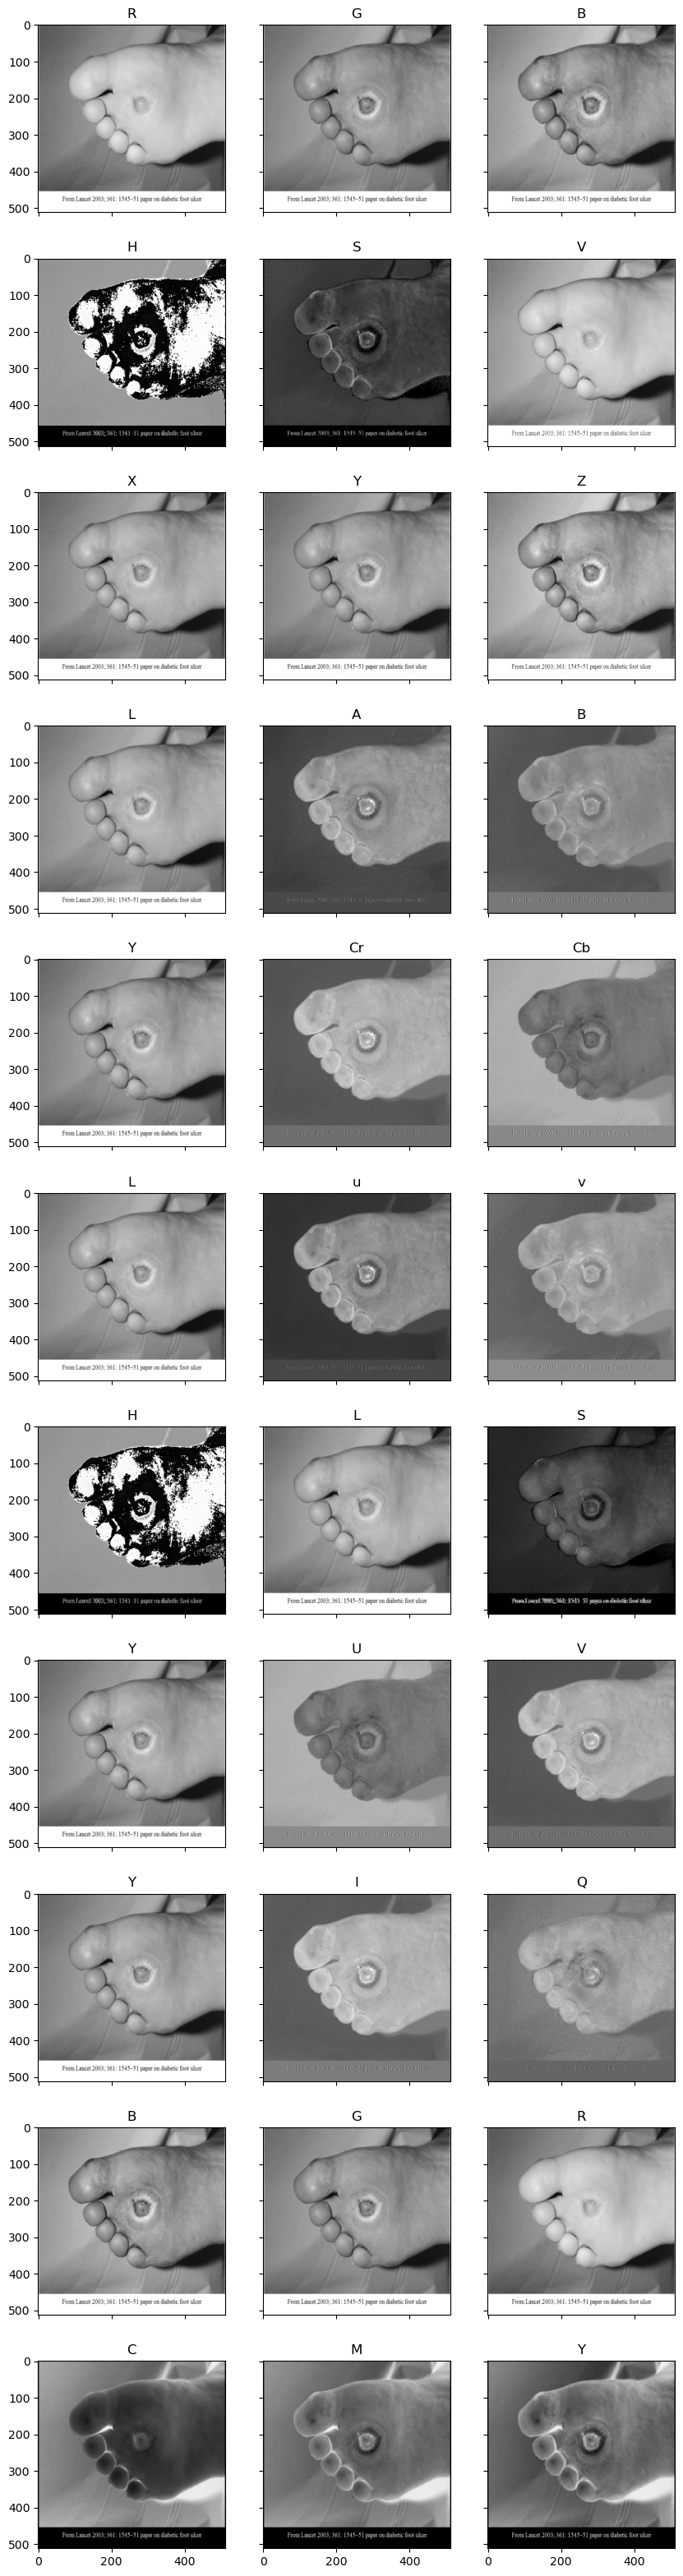

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

""" Primeros vamos a analizar la imagen en múltiples espacios de color"""
img = cv2.imread('Ulcers/U1.png')
# Img rgb
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Img hsv
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Img XYZ
img_xyz = cv2.cvtColor(img, cv2.COLOR_BGR2XYZ)
# Img LAB
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
# Img YCrCb
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
# Img Luv
img_luv = cv2.cvtColor(img, cv2.COLOR_BGR2Luv)
# Img HLS
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
# Img YUV
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
# Img YIQ
img_Y = 0.299*img_rgb[:,:,0] + 0.587*img_rgb[:,:,1] + 0.114*img_rgb[:,:,2]
img_I = 0.596*img_rgb[:,:,0] - 0.275*img_rgb[:,:,1] - 0.321*img_rgb[:,:,2]
img_Q = 0.212*img_rgb[:,:,0]- 0.523*img_rgb[:,:,1] + 0.311*img_rgb[:,:,2]
# Concatenamos los canales para hacer nuestro YIQ     
img_yiq = np.dstack((img_Y, img_I, img_Q))     
# Img CMY
img_cmy = np.dstack((255-img_rgb[:,:,0], 255-img_rgb[:,:,1], 255-img_rgb[:,:,2]))



""" Graficamos todos estos espacios de color """

fig, axs = plt.subplots(11, 3, figsize=(10, 40), sharex=True, sharey=True)
# RGB
axs[0, 0].imshow(img_rgb[:,:,0], cmap="gray")
axs[0, 0].set_title("R")
axs[0, 1].imshow(img_rgb[:,:,1], cmap="gray")
axs[0, 1].set_title("G")
axs[0, 2].imshow(img_rgb[:,:,2], cmap="gray")
axs[0, 2].set_title("B")

# HSV
axs[1, 0].imshow(img_hsv[:,:,0], cmap="gray")
axs[1, 0].set_title("H")
axs[1, 1].imshow(img_hsv[:,:,1], cmap="gray")
axs[1, 1].set_title("S")
axs[1, 2].imshow(img_hsv[:,:,2], cmap="gray")
axs[1, 2].set_title("V")

# XYZ
axs[2, 0].imshow(img_xyz[:,:,0], cmap="gray")
axs[2, 0].set_title("X")
axs[2, 1].imshow(img_xyz[:,:,1], cmap="gray")
axs[2, 1].set_title("Y")
axs[2, 2].imshow(img_xyz[:,:,2], cmap="gray")
axs[2, 2].set_title("Z")

# LAB
axs[3, 0].imshow(img_lab[:,:,0], cmap="gray")
axs[3, 0].set_title("L")
axs[3, 1].imshow(img_lab[:,:,1], cmap="gray")
axs[3, 1].set_title("A")
axs[3, 2].imshow(img_lab[:,:,2], cmap="gray")
axs[3, 2].set_title("B")

# YCrCb
axs[4, 0].imshow(img_ycrcb[:,:,0], cmap="gray")
axs[4, 0].set_title("Y")
axs[4, 1].imshow(img_ycrcb[:,:,1], cmap="gray")
axs[4, 1].set_title("Cr")
axs[4, 2].imshow(img_ycrcb[:,:,2], cmap="gray")
axs[4, 2].set_title("Cb")

# Luv
axs[5, 0].imshow(img_luv[:,:,0], cmap="gray")
axs[5, 0].set_title("L")
axs[5, 1].imshow(img_luv[:,:,1], cmap="gray")
axs[5, 1].set_title("u")
axs[5, 2].imshow(img_luv[:,:,2], cmap="gray")
axs[5, 2].set_title("v")

# HLS
axs[6, 0].imshow(img_hls[:,:,0], cmap="gray")
axs[6, 0].set_title("H")
axs[6, 1].imshow(img_hls[:,:,1], cmap="gray")
axs[6, 1].set_title("L")
axs[6, 2].imshow(img_hls[:,:,2], cmap="gray")
axs[6, 2].set_title("S")

# YUV
axs[7, 0].imshow(img_yuv[:,:,0], cmap="gray")
axs[7, 0].set_title("Y")
axs[7, 1].imshow(img_yuv[:,:,1], cmap="gray")
axs[7, 1].set_title("U")
axs[7, 2].imshow(img_yuv[:,:,2], cmap="gray")
axs[7, 2].set_title("V")

# YIQ
axs[8, 0].imshow(img_yiq[:,:,0], cmap="gray")
axs[8, 0].set_title("Y")
axs[8, 1].imshow(img_yiq[:,:,1], cmap="gray")
axs[8, 1].set_title("I")
axs[8, 2].imshow(img_yiq[:,:,2], cmap="gray")
axs[8, 2].set_title("Q");

# BGR
axs[9, 0].imshow(img[:,:,0], cmap="gray")
axs[9, 0].set_title("B")
axs[9, 1].imshow(img[:,:,1], cmap="gray")
axs[9, 1].set_title("G")
axs[9, 2].imshow(img[:,:,2], cmap="gray")
axs[9, 2].set_title("R")

# CMY
axs[10, 0].imshow(img_cmy[:,:,0], cmap="gray")
axs[10, 0].set_title("C")
axs[10, 1].imshow(img_cmy[:,:,1], cmap="gray")
axs[10, 1].set_title("M")
axs[10, 2].imshow(img_cmy[:,:,2], cmap="gray")
axs[10, 2].set_title("Y");

KeyboardInterrupt: 

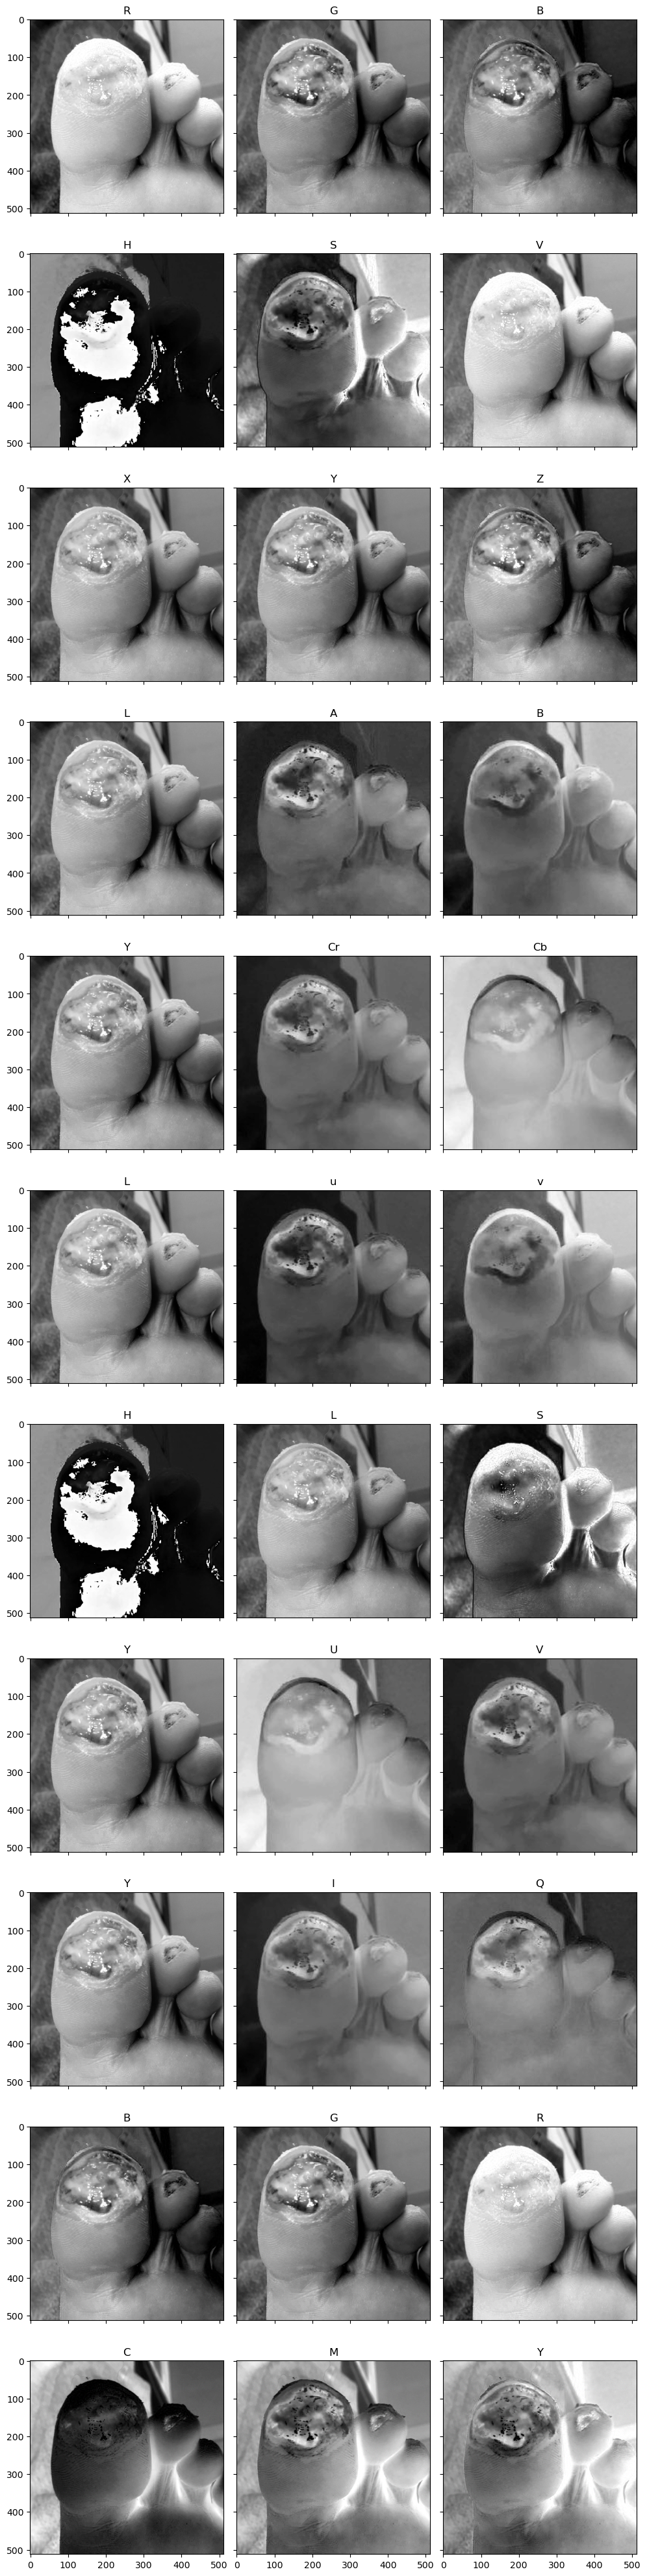

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import filedialog, ttk
from PIL import Image, ImageTk

class ColorSpaceVisualizerGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Color Space Visualizer")
        
        # Create main frame
        self.main_frame = ttk.Frame(root, padding="10")
        self.main_frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))
        
        # Create and configure button
        self.select_button = ttk.Button(
            self.main_frame,
            text="Select Image",
            command=self.select_image
        )
        self.select_button.grid(row=0, column=0, pady=10)
        
        # Create status label
        self.status_label = ttk.Label(self.main_frame, text="No image selected")
        self.status_label.grid(row=1, column=0, pady=5)
        
        # Initialize figure and canvas as None
        self.fig = None
        self.canvas = None

    def select_image(self):
        # Open file dialog
        file_path = filedialog.askopenfilename(
            filetypes=[
                ("Image files", "*.png *.jpg *.jpeg *.bmp *.tiff *.gif")
            ]
        )
        
        if file_path:
            self.status_label.config(text=f"Processing image: {file_path}")
            self.process_image(file_path)
            self.status_label.config(text=f"Showing results for: {file_path}")

    def process_image(self, image_path):
        # Read and process image
        img = cv2.imread(image_path)
        
        # Convert to different color spaces
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        img_xyz = cv2.cvtColor(img, cv2.COLOR_BGR2XYZ)
        img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
        img_luv = cv2.cvtColor(img, cv2.COLOR_BGR2Luv)
        img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
        img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        
        # Calculate YIQ
        img_Y = 0.299*img_rgb[:,:,0] + 0.587*img_rgb[:,:,1] + 0.114*img_rgb[:,:,2]
        img_I = 0.596*img_rgb[:,:,0] - 0.275*img_rgb[:,:,1] - 0.321*img_rgb[:,:,2]
        img_Q = 0.212*img_rgb[:,:,0] - 0.523*img_rgb[:,:,1] + 0.311*img_rgb[:,:,2]
        img_yiq = np.dstack((img_Y, img_I, img_Q))
        
        # Calculate CMY
        img_cmy = np.dstack((255-img_rgb[:,:,0], 255-img_rgb[:,:,1], 255-img_rgb[:,:,2]))

        # Clear previous figure if it exists
        if self.fig is not None:
            plt.close(self.fig)
        if self.canvas is not None:
            self.canvas.get_tk_widget().destroy()

        # Create new figure
        self.fig, axs = plt.subplots(11, 3, figsize=(10, 40), sharex=True, sharey=True)
        
        # Plot all color channels
        # RGB
        axs[0, 0].imshow(img_rgb[:,:,0], cmap="gray")
        axs[0, 0].set_title("R")
        axs[0, 1].imshow(img_rgb[:,:,1], cmap="gray")
        axs[0, 1].set_title("G")
        axs[0, 2].imshow(img_rgb[:,:,2], cmap="gray")
        axs[0, 2].set_title("B")

        # HSV
        axs[1, 0].imshow(img_hsv[:,:,0], cmap="gray")
        axs[1, 0].set_title("H")
        axs[1, 1].imshow(img_hsv[:,:,1], cmap="gray")
        axs[1, 1].set_title("S")
        axs[1, 2].imshow(img_hsv[:,:,2], cmap="gray")
        axs[1, 2].set_title("V")

        # XYZ
        axs[2, 0].imshow(img_xyz[:,:,0], cmap="gray")
        axs[2, 0].set_title("X")
        axs[2, 1].imshow(img_xyz[:,:,1], cmap="gray")
        axs[2, 1].set_title("Y")
        axs[2, 2].imshow(img_xyz[:,:,2], cmap="gray")
        axs[2, 2].set_title("Z")

        # LAB
        axs[3, 0].imshow(img_lab[:,:,0], cmap="gray")
        axs[3, 0].set_title("L")
        axs[3, 1].imshow(img_lab[:,:,1], cmap="gray")
        axs[3, 1].set_title("A")
        axs[3, 2].imshow(img_lab[:,:,2], cmap="gray")
        axs[3, 2].set_title("B")

        # YCrCb
        axs[4, 0].imshow(img_ycrcb[:,:,0], cmap="gray")
        axs[4, 0].set_title("Y")
        axs[4, 1].imshow(img_ycrcb[:,:,1], cmap="gray")
        axs[4, 1].set_title("Cr")
        axs[4, 2].imshow(img_ycrcb[:,:,2], cmap="gray")
        axs[4, 2].set_title("Cb")

        # Luv
        axs[5, 0].imshow(img_luv[:,:,0], cmap="gray")
        axs[5, 0].set_title("L")
        axs[5, 1].imshow(img_luv[:,:,1], cmap="gray")
        axs[5, 1].set_title("u")
        axs[5, 2].imshow(img_luv[:,:,2], cmap="gray")
        axs[5, 2].set_title("v")

        # HLS
        axs[6, 0].imshow(img_hls[:,:,0], cmap="gray")
        axs[6, 0].set_title("H")
        axs[6, 1].imshow(img_hls[:,:,1], cmap="gray")
        axs[6, 1].set_title("L")
        axs[6, 2].imshow(img_hls[:,:,2], cmap="gray")
        axs[6, 2].set_title("S")

        # YUV
        axs[7, 0].imshow(img_yuv[:,:,0], cmap="gray")
        axs[7, 0].set_title("Y")
        axs[7, 1].imshow(img_yuv[:,:,1], cmap="gray")
        axs[7, 1].set_title("U")
        axs[7, 2].imshow(img_yuv[:,:,2], cmap="gray")
        axs[7, 2].set_title("V")

        # YIQ
        axs[8, 0].imshow(img_yiq[:,:,0], cmap="gray")
        axs[8, 0].set_title("Y")
        axs[8, 1].imshow(img_yiq[:,:,1], cmap="gray")
        axs[8, 1].set_title("I")
        axs[8, 2].imshow(img_yiq[:,:,2], cmap="gray")
        axs[8, 2].set_title("Q")

        # BGR
        axs[9, 0].imshow(img[:,:,0], cmap="gray")
        axs[9, 0].set_title("B")
        axs[9, 1].imshow(img[:,:,1], cmap="gray")
        axs[9, 1].set_title("G")
        axs[9, 2].imshow(img[:,:,2], cmap="gray")
        axs[9, 2].set_title("R")

        # CMY
        axs[10, 0].imshow(img_cmy[:,:,0], cmap="gray")
        axs[10, 0].set_title("C")
        axs[10, 1].imshow(img_cmy[:,:,1], cmap="gray")
        axs[10, 1].set_title("M")
        axs[10, 2].imshow(img_cmy[:,:,2], cmap="gray")
        axs[10, 2].set_title("Y")

        plt.tight_layout()
        
        # Create canvas and add to GUI
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.main_frame)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=2, column=0, pady=10)

if __name__ == "__main__":
    root = tk.Tk()
    app = ColorSpaceVisualizerGUI(root)
    root.mainloop()

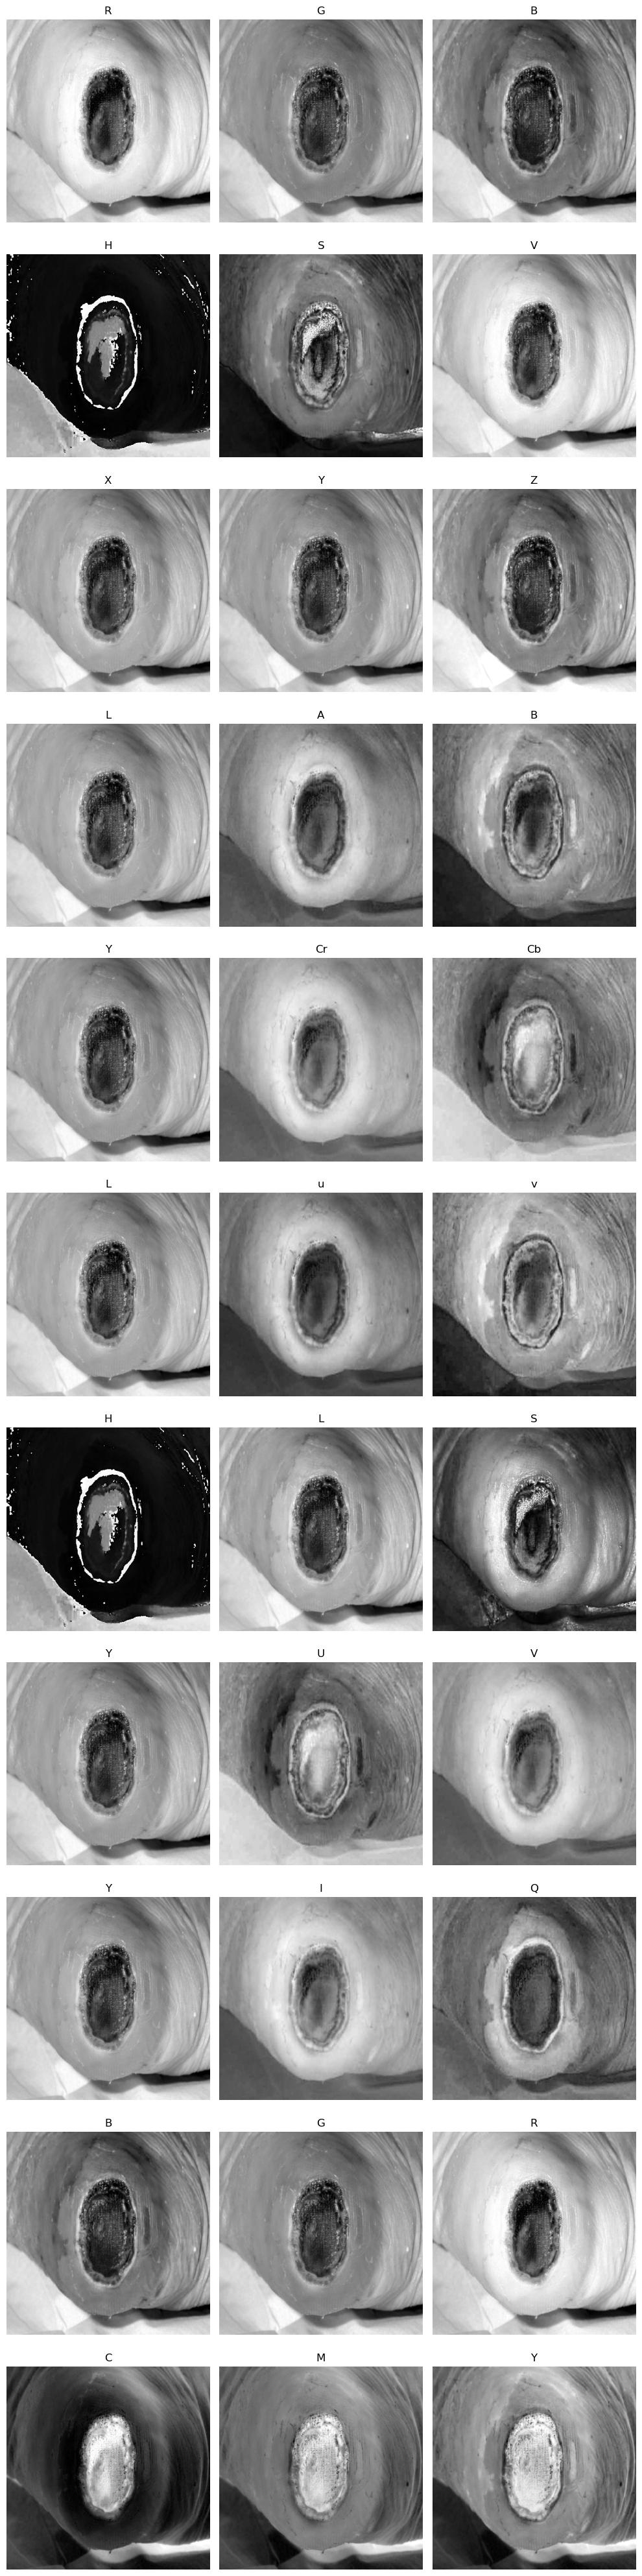

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import filedialog, ttk

class ColorSpaceVisualizerGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Color Space Visualizer")
        
        # Create main frame
        self.main_frame = ttk.Frame(root, padding="10")
        self.main_frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))
        
        # Create top frame for controls
        self.control_frame = ttk.Frame(self.main_frame)
        self.control_frame.grid(row=0, column=0, sticky=(tk.W, tk.E))
        
        # Create and configure button
        self.select_button = ttk.Button(
            self.control_frame,
            text="Select Image",
            command=self.select_image
        )
        self.select_button.grid(row=0, column=0, pady=10)
        
        # Create status label
        self.status_label = ttk.Label(self.control_frame, text="No image selected")
        self.status_label.grid(row=1, column=0, pady=5)
        
        # Create canvas with scrollbar
        self.canvas_frame = ttk.Frame(self.main_frame)
        self.canvas_frame.grid(row=1, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))
        
        # Create canvas
        self.canvas = tk.Canvas(self.canvas_frame)
        self.scrollbar = ttk.Scrollbar(self.canvas_frame, orient="vertical", command=self.canvas.yview)
        self.scrollable_frame = ttk.Frame(self.canvas)
        
        self.scrollable_frame.bind(
            "<Configure>",
            lambda e: self.canvas.configure(scrollregion=self.canvas.bbox("all"))
        )
        
        self.canvas.create_window((0, 0), window=self.scrollable_frame, anchor="nw")
        self.canvas.configure(yscrollcommand=self.scrollbar.set)
        
        # Pack scrollbar and canvas
        self.scrollbar.pack(side="right", fill="y")
        self.canvas.pack(side="left", fill="both", expand=True)
        
        # Configure grid weights
        self.main_frame.columnconfigure(0, weight=1)
        self.main_frame.rowconfigure(1, weight=1)
        root.columnconfigure(0, weight=1)
        root.rowconfigure(0, weight=1)
        
        # Initialize figure and matplotlib canvas as None
        self.fig = None
        self.matplotlib_canvas = None
        
        # Bind mousewheel to canvas for better scrolling
        self.canvas.bind_all("<MouseWheel>", self._on_mousewheel)
        
    def _on_mousewheel(self, event):
        self.canvas.yview_scroll(int(-1*(event.delta/120)), "units")

    def select_image(self):
        # Open file dialog
        file_path = filedialog.askopenfilename(
            filetypes=[
                ("Image files", "*.png *.jpg *.jpeg *.bmp *.tiff *.gif")
            ]
        )
        
        if file_path:
            self.status_label.config(text=f"Processing image: {file_path}")
            self.process_image(file_path)
            self.status_label.config(text=f"Showing results for: {file_path}")

    def process_image(self, image_path):
        # Read and process image
        img = cv2.imread(image_path)
        
        # Convert to different color spaces
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        img_xyz = cv2.cvtColor(img, cv2.COLOR_BGR2XYZ)
        img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
        img_luv = cv2.cvtColor(img, cv2.COLOR_BGR2Luv)
        img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
        img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        
        # Calculate YIQ
        img_Y = 0.299*img_rgb[:,:,0] + 0.587*img_rgb[:,:,1] + 0.114*img_rgb[:,:,2]
        img_I = 0.596*img_rgb[:,:,0] - 0.275*img_rgb[:,:,1] - 0.321*img_rgb[:,:,2]
        img_Q = 0.212*img_rgb[:,:,0] - 0.523*img_rgb[:,:,1] + 0.311*img_rgb[:,:,2]
        img_yiq = np.dstack((img_Y, img_I, img_Q))
        
        # Calculate CMY
        img_cmy = np.dstack((255-img_rgb[:,:,0], 255-img_rgb[:,:,1], 255-img_rgb[:,:,2]))

        # Clear previous figure if it exists
        if self.fig is not None:
            plt.close(self.fig)
        if self.matplotlib_canvas is not None:
            self.matplotlib_canvas.get_tk_widget().destroy()

        # Diccionario de espacios de color y nombres de canales
        color_spaces = {
        "RGB": (img_rgb, ["R", "G", "B"]),
        "HSV": (img_hsv, ["H", "S", "V"]),
        "XYZ": (img_xyz, ["X", "Y", "Z"]),
        "LAB": (img_lab, ["L", "A", "B"]),
        "YCrCb": (img_ycrcb, ["Y", "Cr", "Cb"]),
        "Luv": (img_luv, ["L", "u", "v"]),
        "HLS": (img_hls, ["H", "L", "S"]),
        "YUV": (img_yuv, ["Y", "U", "V"]),
        "YIQ": (img_yiq, ["Y", "I", "Q"]),
        "BGR": (img, ["B", "G", "R"]),
        "CMY": (img_cmy, ["C", "M", "Y"]),
        }

        # Create new figure
        self.fig, axs = plt.subplots(11, 3, figsize=(10, 40), sharex=True, sharey=True)
        
        for i, (space, (img_data, channels)) in enumerate(color_spaces.items()):
            for j in range(3):
                axs[i, j].imshow(img_data[:, :, j], cmap="gray")
                axs[i, j].set_title(channels[j])
                axs[i, j].axis("off")

        plt.tight_layout()
        
        # Create matplotlib canvas and add to scrollable frame
        self.matplotlib_canvas = FigureCanvasTkAgg(self.fig, master=self.scrollable_frame)
        self.matplotlib_canvas.draw()
        self.matplotlib_canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

if __name__ == "__main__":
    root = tk.Tk()
    app = ColorSpaceVisualizerGUI(root)
    # Set a reasonable starting size for the window
    root.geometry("800x600")
    root.mainloop()